In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
veriseti=pd.read_csv("C:\\Users\\azsar\\OneDrive\\Masaüstü\\Cost_of_Living_Index_by_Country_2024.csv")

In [3]:
veriseti

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


In [4]:
veriseti.describe
#veriseti açıklaması

<bound method NDFrame.describe of      Rank      Country  Cost of Living Index  Rent Index  \
0       1  Switzerland                 101.1        46.5   
1       2      Bahamas                  85.0        36.7   
2       3      Iceland                  83.0        39.2   
3       4    Singapore                  76.7        67.2   
4       5     Barbados                  76.6        19.0   
..    ...          ...                   ...         ...   
116   117   Bangladesh                  22.5         2.4   
117   118        India                  21.2         5.6   
118   119        Egypt                  21.0         3.7   
119   120        Libya                  20.4         4.3   
120   121     Pakistan                  18.8         2.8   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                              74.9            109.1                    97.0   
1                              61.8             81.6                    83.3   
2    

In [5]:
veriseti.Country.count()
#toplam ülke sayısı

121

In [6]:
%matplotlib inline

([<matplotlib.axis.XTick at 0x1ff95a828d0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100')])

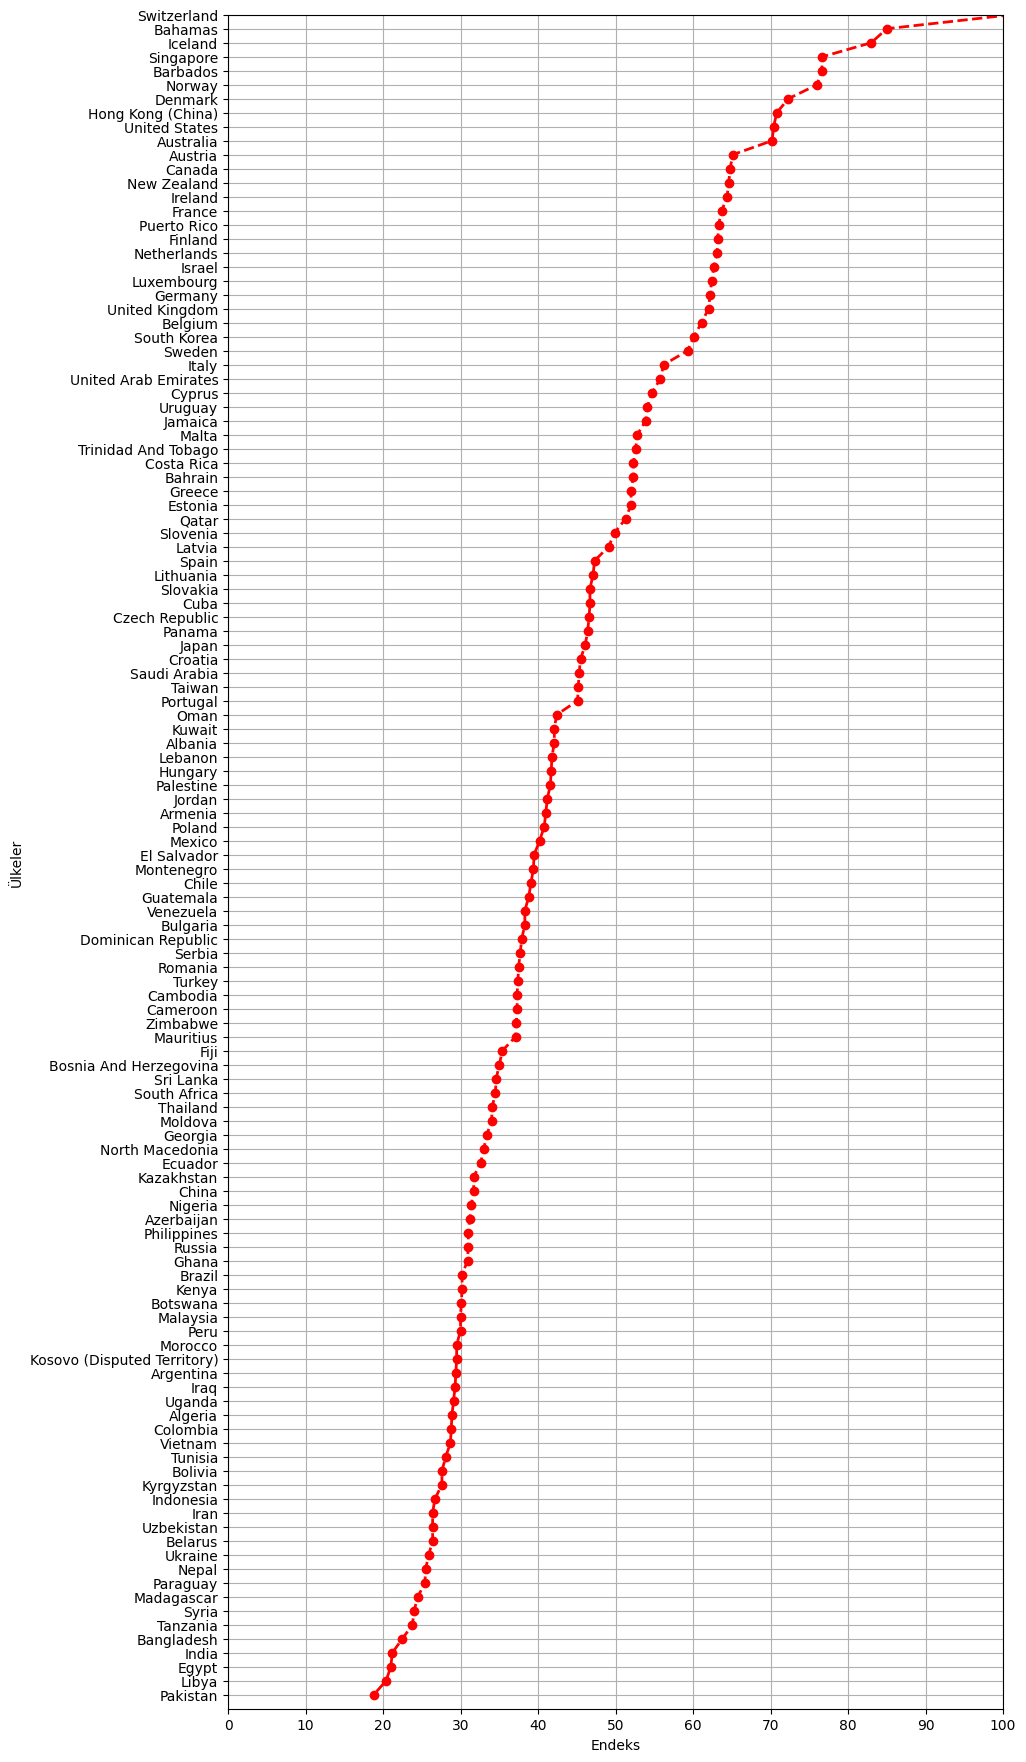

In [7]:
#tüm ülkelerin yaşam maliyeti sıralaması
fig=plt.figure(figsize=(10,22))
ax=fig.add_subplot(1,1,1)
ax.plot(veriseti["Cost of Living Index"],veriseti["Country"],color="Red",linestyle="--",marker="o",linewidth=2)
plt.xlabel("Endeks")
plt.ylabel("Ülkeler")
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, len(veriseti["Country"]))
plt.gca().invert_yaxis()
plt.xticks(np.arange(0, 101, step=10))

<Axes: xlabel='Cost of Living Index', ylabel='Density'>

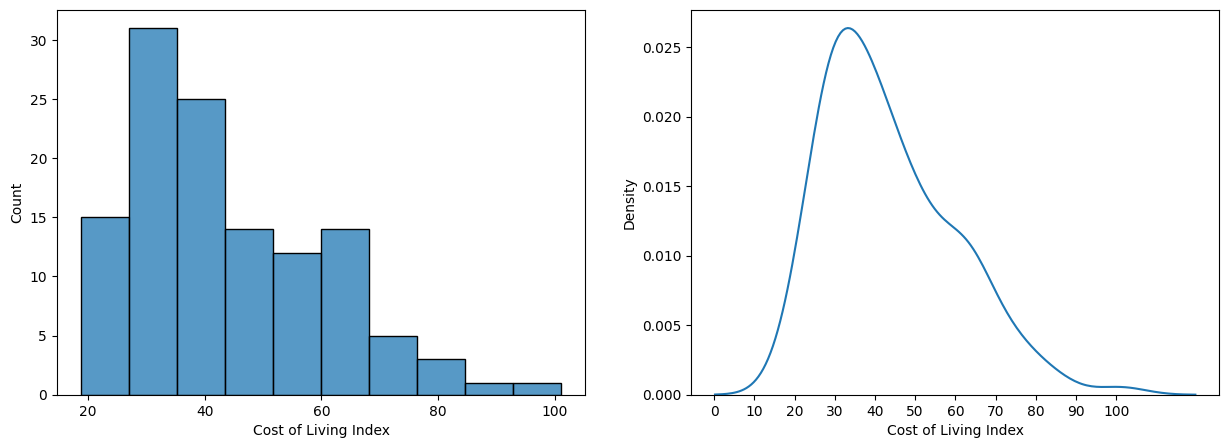

In [8]:
#yaşam maliyetinin endeksinin dağılımı ve yoğunluğu
fig,axs=plt.subplots(1,2,figsize=(15,5))
sns.histplot(veriseti["Cost of Living Index"],ax=axs[0])
plt.xticks(np.arange(0, 101, step=10))
sns.kdeplot(x=veriseti["Cost of Living Index"],ax=axs[1])

<Axes: ylabel='Density'>

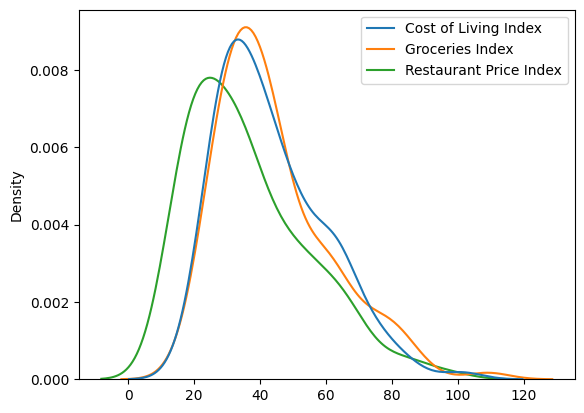

In [9]:
#yaşam maliyeti,market ve restaurant fiyatı indekslerinin yoğunluğu. birbirine yakın oldukları görülüyor
sns.kdeplot(veriseti[['Cost of Living Index',"Groceries Index","Restaurant Price Index"]])

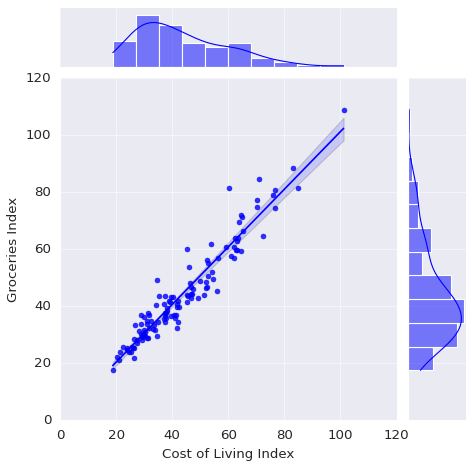

In [10]:
#yaşam maliyeti ve market indeksinin karşılaşıtılması ve korelasyonu
plt.style.use("classic")
with sns.axes_style("darkgrid"):sns.jointplot(x="Cost of Living Index",y="Groceries Index",data=veriseti, kind="reg")


In [11]:
#tüm  indekslerin ülkeler bazında karşılaştırılması. en yüksek 5 ve en düşük 5 ülke. 

maliyet_verisi_ilk=veriseti.loc[:,["Country","Cost of Living Index"]].sort_values(by="Cost of Living Index",ascending=False).head(5)
maliyet_verisi_son=veriseti.loc[:,["Country","Cost of Living Index"]].sort_values(by="Cost of Living Index",ascending=True).head(5)
maliyet_verisi = pd.concat([maliyet_verisi_ilk, maliyet_verisi_son]).drop_duplicates().reset_index(drop=True).sort_values(by="Cost of Living Index",ascending=False)

kira_verisi_ilk=veriseti.loc[:,["Country","Rent Index"]].sort_values(by="Rent Index",ascending=False).head(5)
kira_verisi_son=veriseti.loc[:,["Country","Rent Index"]].sort_values(by="Rent Index",ascending=True).head(5)
kira_verisi = pd.concat([kira_verisi_ilk, kira_verisi_son]).drop_duplicates().reset_index(drop=True).sort_values(by="Rent Index",ascending=False)

market_verisi_ilk=veriseti.loc[:,["Country","Groceries Index"]].sort_values(by="Groceries Index",ascending=False).head(5)
market_verisi_son=veriseti.loc[:,["Country","Groceries Index"]].sort_values(by="Groceries Index",ascending=True).head(5)
market_verisi = pd.concat([market_verisi_ilk, market_verisi_son]).drop_duplicates().reset_index(drop=True).sort_values(by="Groceries Index",ascending=False)

restaurant_verisi_ilk=veriseti.loc[:,["Country","Restaurant Price Index"]].sort_values(by="Restaurant Price Index",ascending=False).head(5)
restaurant_verisi_son=veriseti.loc[:,["Country","Restaurant Price Index"]].sort_values(by="Restaurant Price Index",ascending=True).head(5)
restaurant_verisi = pd.concat([restaurant_verisi_ilk, restaurant_verisi_son]).drop_duplicates().reset_index(drop=True).sort_values(by="Restaurant Price Index",ascending=False)

satin_alma_verisi_ilk=veriseti.loc[:,["Country","Local Purchasing Power Index"]].sort_values(by="Local Purchasing Power Index",ascending=False).head(5)
satin_alma_verisi_son=veriseti.loc[:,["Country","Local Purchasing Power Index"]].sort_values(by="Local Purchasing Power Index",ascending=True).head(5)
satin_alma_verisi = pd.concat([satin_alma_verisi_ilk, satin_alma_verisi_son]).drop_duplicates().reset_index(drop=True).sort_values(by="Local Purchasing Power Index",ascending=False)

kira_maliyet_verisi_ilk=veriseti.loc[:,["Country","Cost of Living Plus Rent Index"]].sort_values(by="Cost of Living Plus Rent Index",ascending=False).head(5)
kira_maliyet_verisi_son=veriseti.loc[:,["Country","Cost of Living Plus Rent Index"]].sort_values(by="Cost of Living Plus Rent Index",ascending=True).head(5)
kira_maliyet_verisi = pd.concat([kira_maliyet_verisi_ilk, kira_maliyet_verisi_son]).drop_duplicates().reset_index(drop=True).sort_values(by="Cost of Living Plus Rent Index",ascending=False)

maliyet_verisi

,Country,Cost of Living Index
0,Switzerland,101.1
1,Bahamas,85.0
2,Iceland,83.0
3,Singapore,76.7
4,Barbados,76.6
9,Bangladesh,22.5
8,India,21.2
7,Egypt,21.0
6,Libya,20.4
5,Pakistan,18.8


<Axes: xlabel='Country', ylabel='Cost of Living Plus Rent Index'>

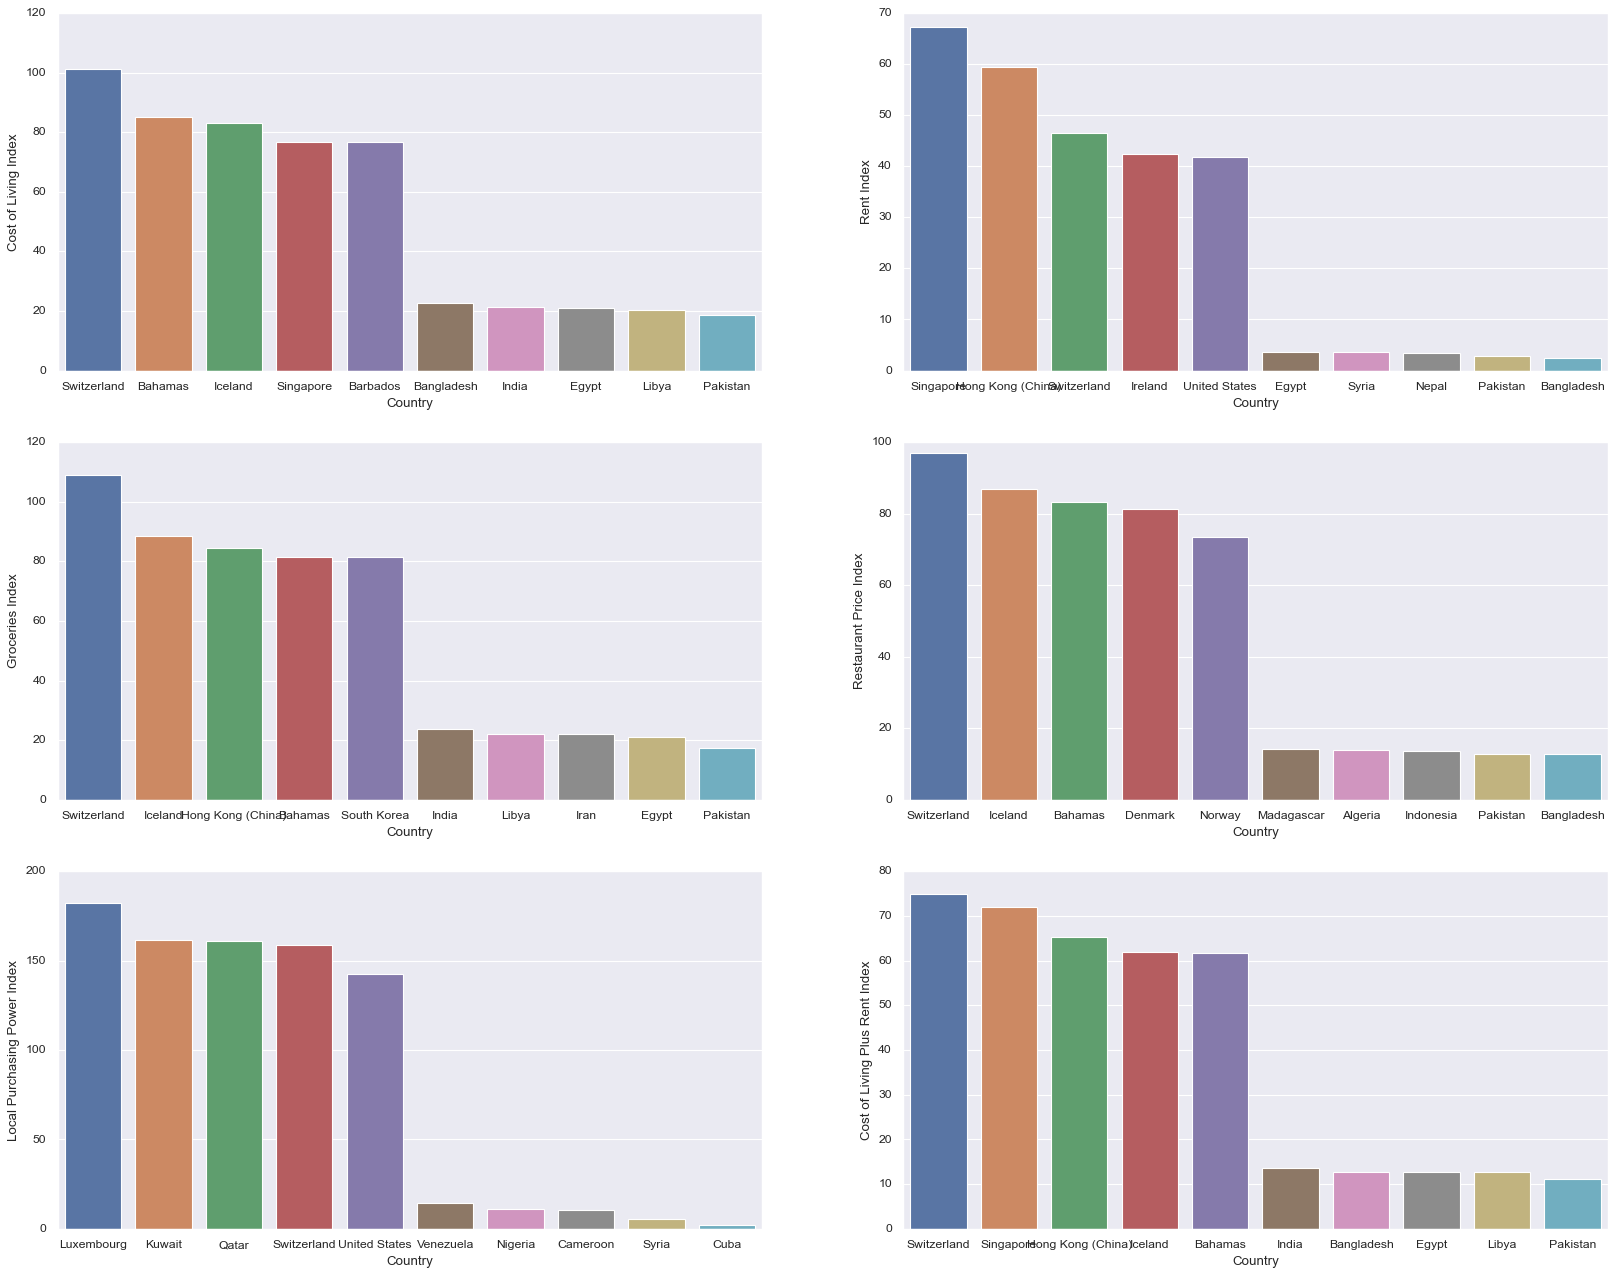

In [18]:
#yukarıdaki verilerin bar grafiklerinin çıkarılması
sns.set_style("darkgrid")

fig,axes=plt.subplots(3,2,figsize=(25,19))
palette = sns.color_palette("viridis")
sns.barplot(x="Country",y="Cost of Living Index",data=maliyet_verisi,hue="Country",ax=axes[0,0])
sns.barplot(x="Country",y="Rent Index",data=kira_verisi,hue="Country",ax=axes[0,1])
sns.barplot(x="Country",y="Groceries Index",data=market_verisi,hue="Country",ax=axes[1,0])
sns.barplot(x="Country",y="Restaurant Price Index",data=restaurant_verisi,hue="Country",ax=axes[1,1])
sns.barplot(x="Country",y="Local Purchasing Power Index",data=satin_alma_verisi,hue="Country",ax=axes[2,0])
sns.barplot(x="Country",y="Cost of Living Plus Rent Index",data=kira_maliyet_verisi,hue="Country",ax=axes[2,1])


In [13]:
#seçili 3 ülkenin verileri. en pahalı isvirçe, en ucuz pakistan ve ortalama olarak türkiye.
ulkeler=["Turkey","Switzerland","Pakistan"]
secili_ulkeler=veriseti[veriseti["Country"].isin(ulkeler)]
secili_ulkeler

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
69,70,Turkey,37.4,13.2,25.8,37.6,30.7,49.0
120,121,Pakistan,18.8,2.8,11.1,17.5,12.9,29.1


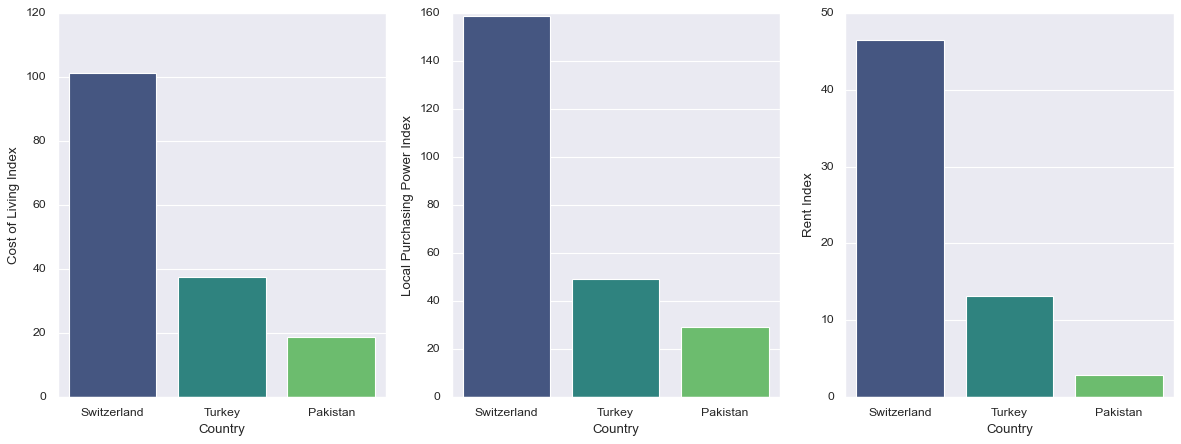

In [14]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, 3 ,figsize=(18, 6))
with sns.axes_style("white"):sns.barplot(x="Country",y="Cost of Living Index",data=secili_ulkeler,hue="Country",palette="viridis",ax=axs[0])
with sns.axes_style("white"):sns.barplot(x="Country",y="Local Purchasing Power Index",data=secili_ulkeler,hue="Country",palette="viridis",ax=axs[1])
with sns.axes_style("white"):sns.barplot(x="Country",y="Rent Index",data=secili_ulkeler,hue="Country",palette="viridis",ax=axs[2])

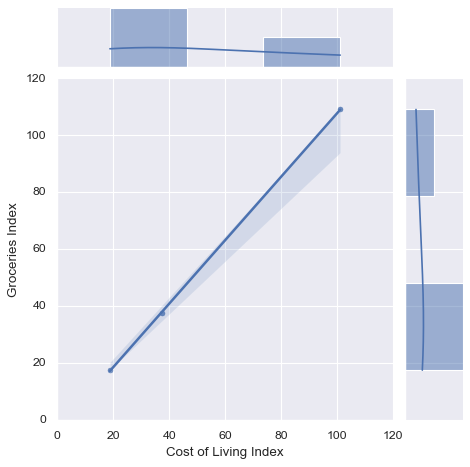

In [15]:
#secili ülkelerin market ve yaşam maliyeti endekslerinin karşılşaştırılması ve korelasyonu
with sns.axes_style("darkgrid"):sns.jointplot(x="Cost of Living Index",y="Groceries Index",data=secili_ulkeler, kind="reg")

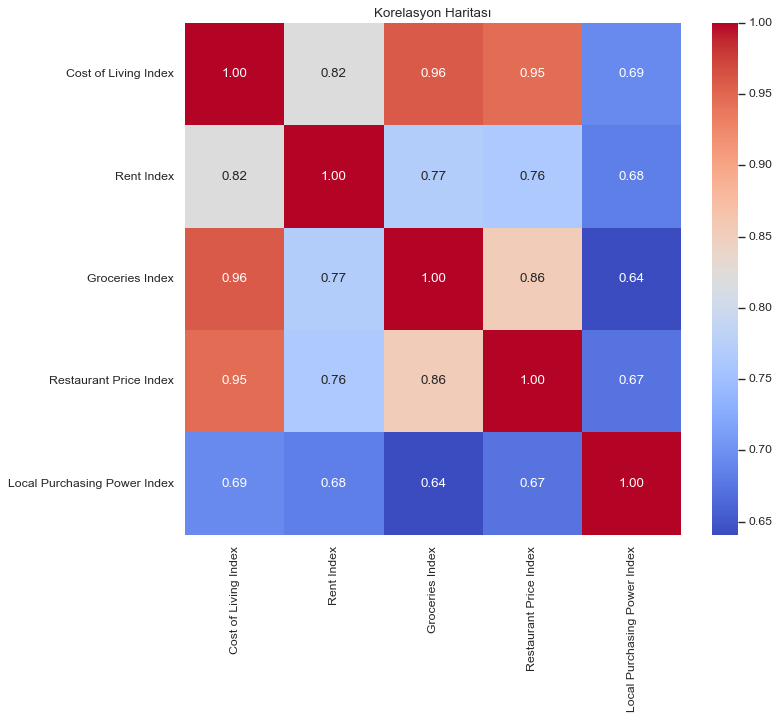

In [16]:
#tüm verilerin birbirleri arasındaki korelasyon haritası
correlation_matrix = veriseti[['Cost of Living Index', 'Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Haritası')
plt.show()